# Liner Regression with Cross Validation

In [21]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Import the data file

In [2]:
df = pd.read_csv("../../../Data/Mice Data/data_after_mice_1.csv",header=0)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_month,issue_year,...,loan_status_Does_not_meet_the_credit_policy_Status_Charged_Off,loan_status_Does_not_meet_the_credit_policy_Status_Fully_Paid,loan_status_Fully_Paid,loan_status_In_Grace_Period,loan_status_Issued,loan_status_Late_16_30_days,loan_status_Late_31_120_days,pymnt_plan_y,initial_list_status_w,application_type_JOINT
0,5000,5000,4975.0,36,10.65,162.87,10,24000.0,12,2011,...,0,0,1,0,0,0,0,0,0,0
1,2500,2500,2500.0,60,15.27,59.83,0,30000.0,12,2011,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36,15.96,84.33,10,12252.0,12,2011,...,0,0,1,0,0,0,0,0,0,0
3,10000,10000,10000.0,36,13.49,339.31,10,49200.0,12,2011,...,0,0,1,0,0,0,0,0,0,0
4,3000,3000,3000.0,60,12.69,67.79,1,80000.0,12,2011,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887270,10000,10000,10000.0,36,11.99,332.10,8,31000.0,1,2015,...,0,0,0,0,0,0,0,0,0,0
887271,24000,24000,24000.0,36,11.99,797.03,10,79000.0,1,2015,...,0,0,0,0,0,0,0,0,0,0
887272,13000,13000,13000.0,60,15.99,316.07,5,35000.0,1,2015,...,0,0,0,0,0,0,0,0,1,0
887273,12000,12000,12000.0,60,19.99,317.86,1,64400.0,1,2015,...,0,0,0,0,0,0,0,0,1,0


In [3]:
#select the dependent(X) and independent variable (y)
X = df[['grade_C','grade_D','grade_E',
        'grade_F','grade_G','total_rec_int',
        'total_pymnt_inv','funded_amnt_inv','sub_grade_B5',
        'sub_grade_C5','sub_grade_C4','sub_grade_B4','sub_grade_D5','sub_grade_C3']].values

y = df[['int_rate']].values

In [4]:
#split the data in train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [5]:
#train the linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#predict the interest rate
predictions = lm.predict(X_test)
predictionx = lm.predict(X_train)

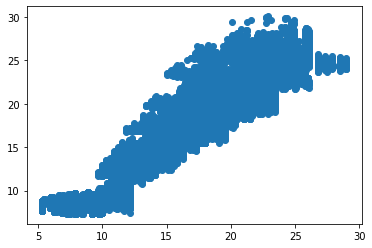

In [7]:
#plot the graph for relation ,on x-axis in is actuall interest rate and on the y axis there is predected interested rate
plt.scatter(y_test,predictions)

In [16]:
#calculate the r-square score
from sklearn.metrics import *
r2_score(y_test,predictions)
# Calculate the absolute errors 
errors = abs(predictions - y_test) 
# Print out the mean absolute error (mae) 
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE) 
mape = 100 * (errors / y_test) 
#print('MAPE:',mape)
# Calculate and display accuracy 
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')
test_int = y_test.tolist()
train_int = y_train.tolist()
#calculate mape
mape = np.mean(np.abs((test_int-predictions) / test_int)) * 100
print('MAPE of test data:',mape)
mape1 = np.mean(np.abs((train_int-predictionx) / train_int)) * 100
print('MAPE of train data:',mape1)

Mean Absolute Error: 0.93 degrees.
Accuracy: 91.4 %.
MAPE of test data: 8.599906914618717
MAPE of train data: 8.606151592482368


# We will map the residual against the predicted value ---the output is random and close to 0 

Text(0, 0.5, 'residuals')

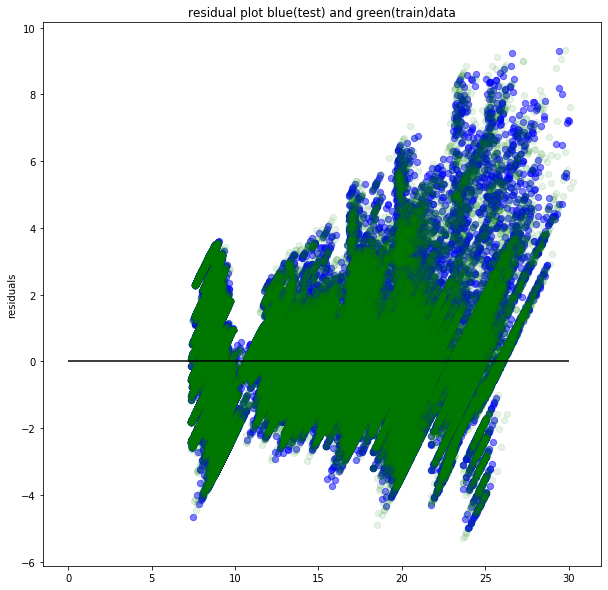

In [14]:
#plot the graph on x-axis there is predicted interest rate and on y-axis there is residual which means difference,
#the green colour are train data and blue is test data
plt.figure(figsize = (10,10))
plt.scatter(lm.predict(X_test),lm.predict(X_test) - test_int,c='b',s=40,alpha=0.5)
plt.scatter(lm.predict(X_train),lm.predict(X_train) - train_int,c='g',s=40,alpha=0.1)
plt.hlines(y=0,xmin=0,xmax=30)
plt.title('residual plot blue(test) and green(train)data')
plt.ylabel('residuals')

In [30]:
#calculte mape after 5 fold CV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import fabs
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores =[]
kf = KFold(n_splits=5, random_state=42, shuffle=True)
i=1
model = LinearRegression()

for train_index, test_index in kf.split(X):
    X_trainD, X_testD = X[train_index], X[test_index]
    y_trainD, y_testD = y[train_index], y[test_index]
    i=i+(int(len(X_train)/5))
    model = LinearRegression()
    model.fit(X_trainD, y_trainD)
    pred= model.predict(X_testD)
    mape=np.mean(np.abs((y_testD-pred) / y_testD)) * 100
    cvscores.append(mape)
mape=np.mean(cvscores)
print('MAPE after 5 fold cross validation :')
print(mape)


MAPE after 5 fold cross validation :
8.606837679022444


After 5 fold cross validation the MAPE value changed by 0.01